In [142]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from my_ml_tools.my_ml_plot import Plot_decision_regions
import warnings
warnings.simplefilter('ignore')

In [121]:
df = pd.read_csv('data/Sample_Semiconductor_Wafer_Test_Data_Simulated.csv')
df.shape

(11034, 9)

In [190]:
print(df.columns)
df.head(10)

Index(['Wafer', 'Process', 'Die_X', 'Die_Y', 'T1_VTH_V', 'T2_Ron_Ohm',
       'T3_IG_5V_A', 'T4_IG_7V_A', 'T5_IG_3V_A'],
      dtype='object')


,Wafer,Process,Die_X,Die_Y,T1_VTH_V,T2_Ron_Ohm,T3_IG_5V_A,T4_IG_7V_A,T5_IG_3V_A
0,1,A,-12,-96,0.934714,0.328396,8.705032e-11,7.458641e-10,2.957321e-11
1,1,A,-8,-96,0.771820,0.402674,1.064587e-10,9.312556e-10,2.728789e-11
2,1,A,-4,-96,0.875027,0.343906,2.460717e-10,1.443542e-09,9.492361e-12
3,1,A,0,-96,1.039321,0.296039,1.277885e-10,1.797049e-09,1.256456e-11
4,1,A,4,-96,0.943150,0.303278,2.593680e-10,1.376044e-09,1.397102e-11
5,1,A,8,-96,0.867922,0.264585,1.578083e-10,6.381088e-10,7.002494e-11
6,1,A,12,-96,0.749528,0.246040,2.398362e-10,1.229081e-09,1.617568e-11
7,1,A,-28,-92,0.930228,0.345640,1.506367e-10,1.649431e-09,1.620624e-11
8,1,A,-24,-92,0.959507,0.255569,9.194982e-11,2.005243e-09,2.968109e-11
9,1,A,-20,-92,0.829932,0.328798,7.836402e-11,1.053117e-09,2.043946e-11


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11034 entries, 0 to 11033
Data columns (total 9 columns):
Wafer         11034 non-null int64
Process       11034 non-null object
Die_X         11034 non-null int64
Die_Y         11034 non-null int64
T1_VTH_V      11034 non-null float64
T2_Ron_Ohm    11034 non-null float64
T3_IG_5V_A    11034 non-null float64
T4_IG_7V_A    11034 non-null float64
T5_IG_3V_A    11034 non-null float64
dtypes: float64(5), int64(3), object(1)
memory usage: 775.9+ KB


In [124]:
for col in df.columns:
    print(col, ':', len(np.unique(df[col])), 'unique values')
    print(np.unique(df[col]))

Wafer : 6 unique values
[1 2 3 4 5 6]
Process : 2 unique values
['A' 'B']
Die_X : 47 unique values
[-96 -92 -88 -84 -80 -76 -72 -68 -64 -60 -56 -52 -48 -44 -40 -36 -32 -28
 -24 -20 -16 -12  -8  -4   0   4   8  12  16  20  24  28  32  36  40  44
  48  52  56  60  64  68  72  76  80  84  88]
Die_Y : 49 unique values
[-96 -92 -88 -84 -80 -76 -72 -68 -64 -60 -56 -52 -48 -44 -40 -36 -32 -28
 -24 -20 -16 -12  -8  -4   0   4   8  12  16  20  24  28  32  36  40  44
  48  52  56  60  64  68  72  76  80  84  88  92  96]
T1_VTH_V : 11034 unique values
[0.53730534 0.54194486 0.54398317 ... 1.05640035 1.05743862 1.09564081]
T2_Ron_Ohm : 11034 unique values
[0.16038067 0.1622175  0.16786498 ... 0.53604434 0.53712159 0.65132734]
T3_IG_5V_A : 11034 unique values
[1.31791009e-11 2.23234122e-11 2.36280294e-11 ... 8.17671148e-10
 9.67566723e-10 1.19391717e-09]
T4_IG_7V_A : 11034 unique values
[1.69300395e-10 1.84271488e-10 1.86995097e-10 ... 5.71047362e-09
 5.71147395e-09 5.89052928e-09]
T5_IG_3V_A : 110

In [125]:
df_temp = df.groupby(['Process', 'Wafer']).agg('count')[['Die_X']]
df_temp.columns = ['Die_Count']
df_temp

Die_Count
Process Wafer           
A       1           1839
        3           1839
        5           1839
B       2           1839
        4           1839
        6           1839

#### Observations on individual feature
> T1_VTH_V: Threshold Voltage Tests

In [241]:
def plot_wafer_map(df, wafer_id, col_x, col_y, col_values, ax=None):
    if ax is None:
        plt.figure(dpi=227)
        ax = plt.gca()
    df_temp = df[df['Wafer'] == wafer_id][[col_y, col_x, col_values]]
    process = np.unique(df[df['Wafer'] == wafer_id]['Process'])[0]
    global df1
    df1.loc[df1.shape[0]] = {
        'Wafer': wafer_id,
        'Process': process,
        'Mean': df_temp[col_values].mean(),
        'Std': df_temp[col_values].std()
    }
    
    df_temp = df_temp.pivot(col_y, col_x, col_values)
    sns.heatmap(df_temp, cmap=plt.cm.RdYlGn_r, ax=ax)
    ax.set_title(f"Wafer #{wafer_id}, Process-{process}")

,Wafer,Process,Mean,Std
0,1,A,0.252120,0.043163
1,2,B,0.240450,0.043437
2,3,A,0.252117,0.043195
3,4,B,0.238908,0.042020
4,5,A,0.252064,0.042917
5,6,B,0.239766,0.042244


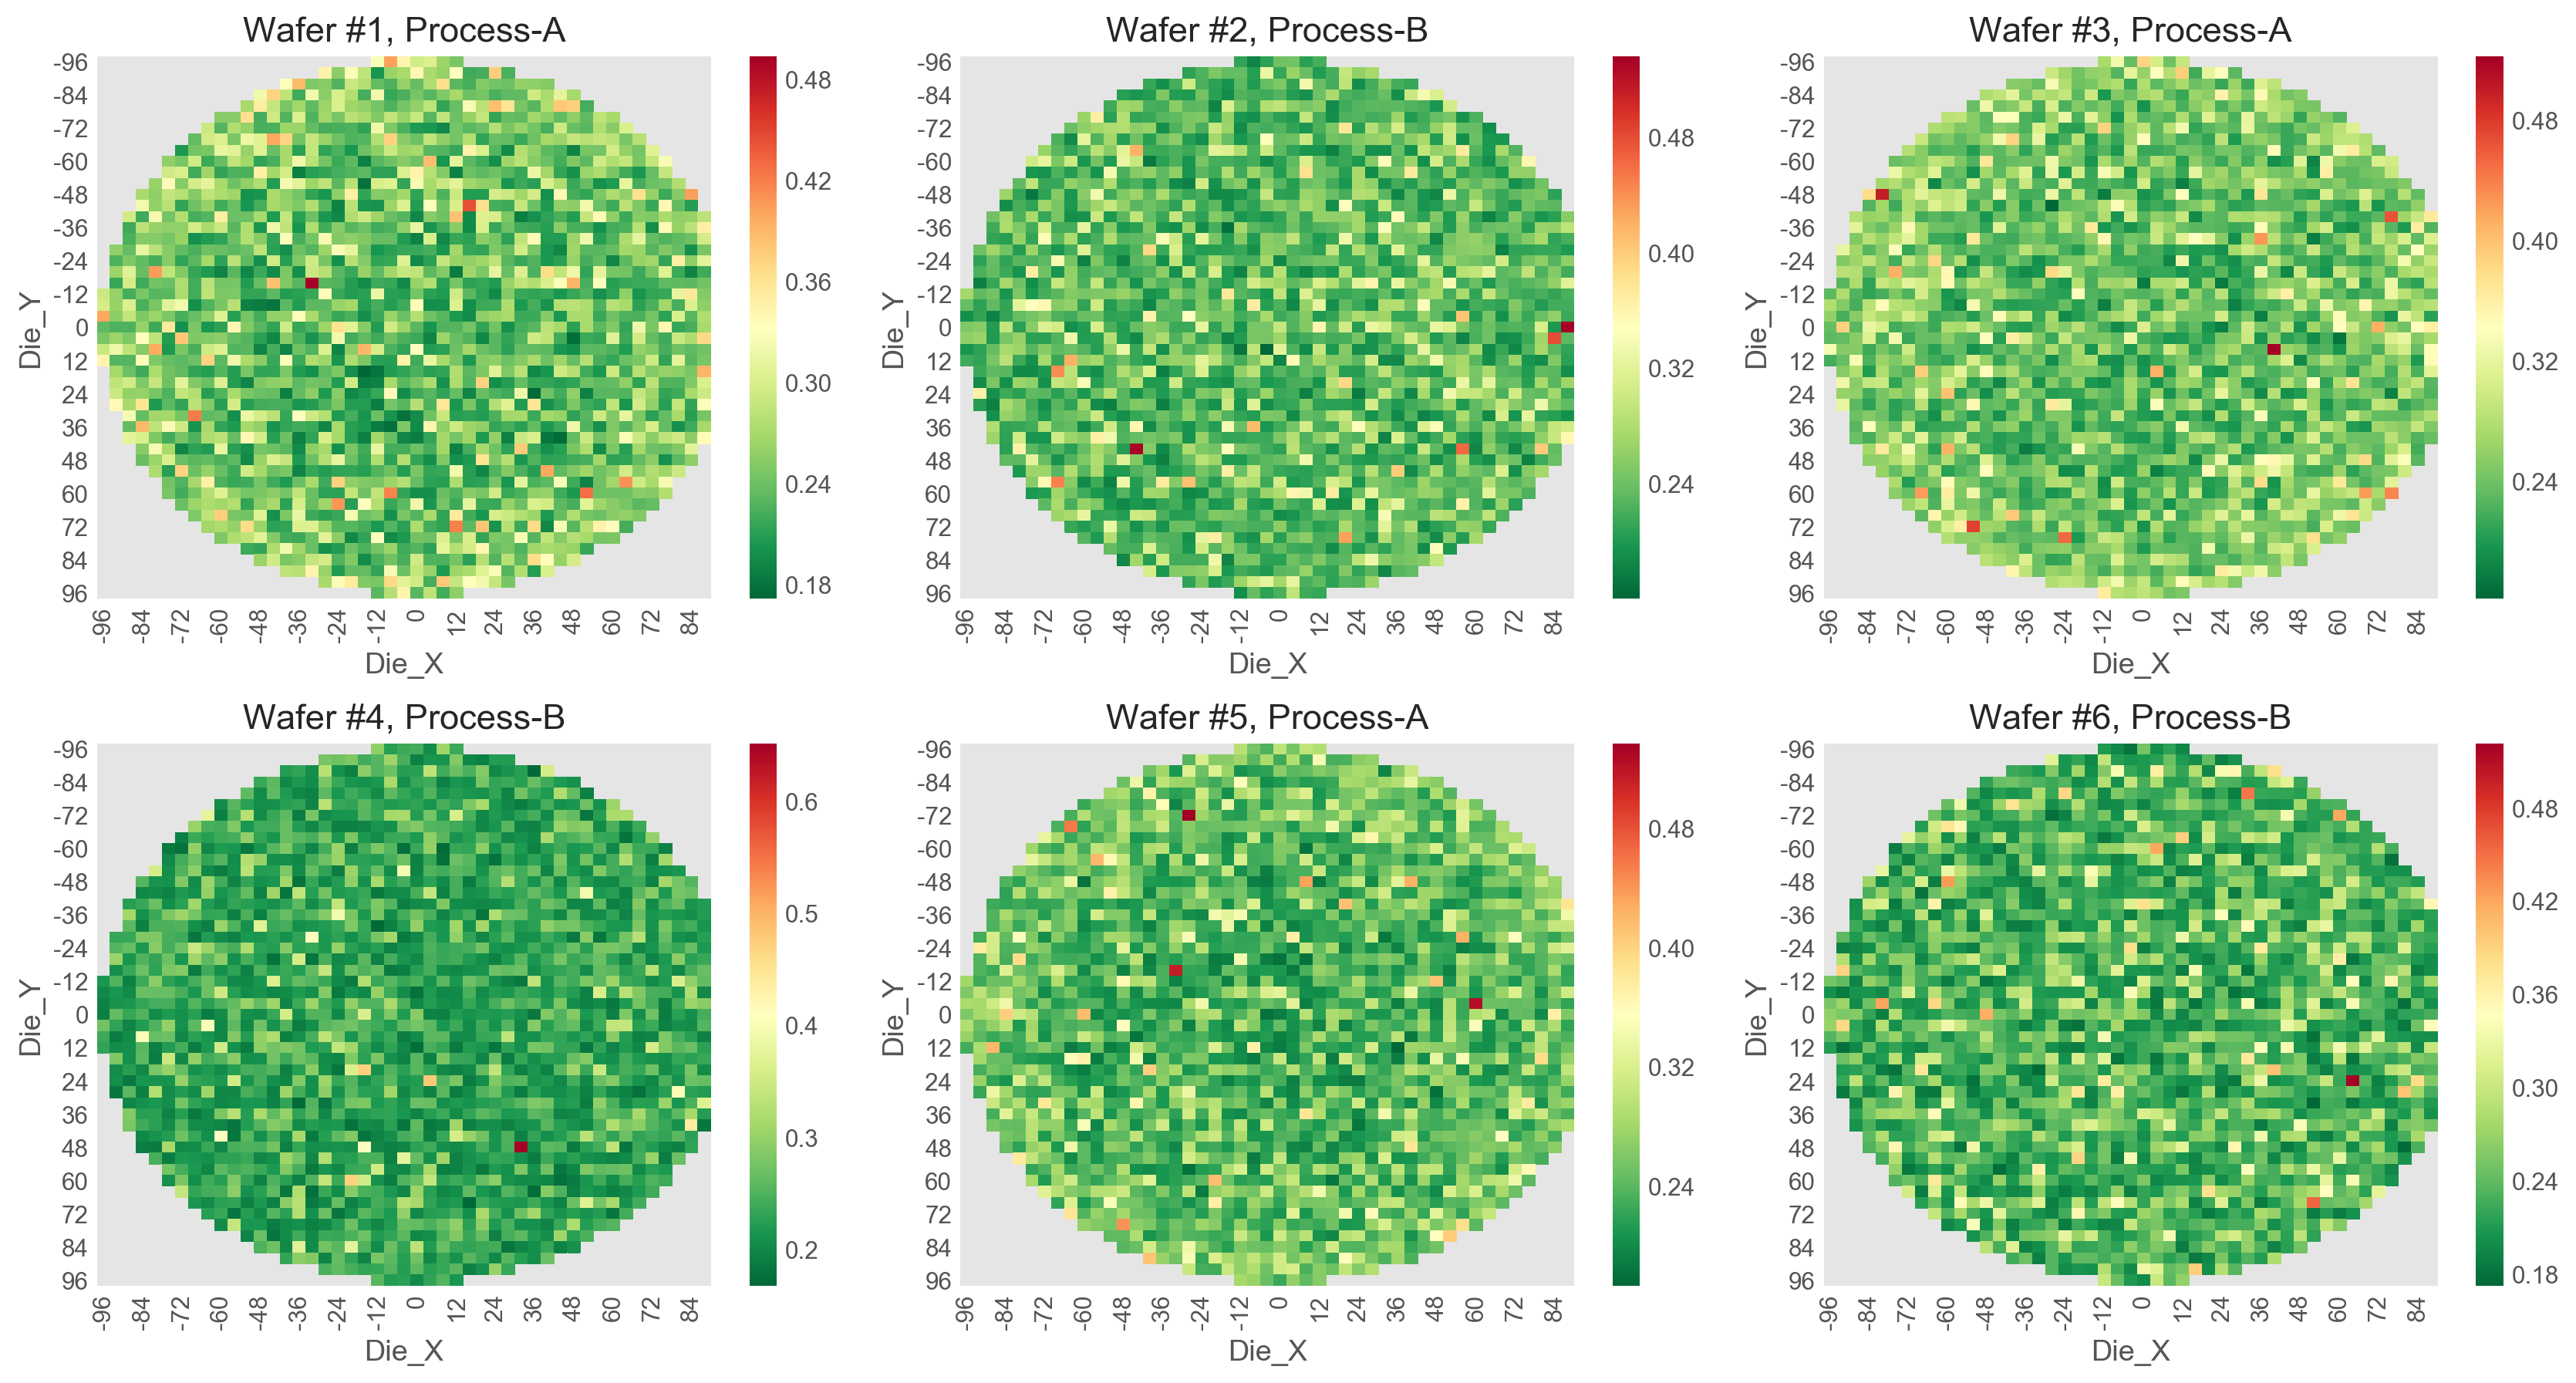

In [243]:
df1 = pd.DataFrame({}, columns=['Wafer', 'Process', 'Mean', 'Std'])

fig, axes = plt.subplots(2, 3, dpi=227, figsize=(15, 8))
for ax, wafer_id in zip(axes.ravel(), np.unique(df['Wafer'])):
    plot_wafer_map(df, wafer_id=wafer_id, col_x='Die_X', col_y='Die_Y', col_values='T2_Ron_Ohm', ax=ax)
    
plt.tight_layout()
plt.savefig('fig.png')
df1

In [244]:
# Pass criteria: T1_VTH_V < 0.95 and T2_Ron_Ohm < 0.3
df_yield = pd.DataFrame({}, columns=['Wafer', 'Process', 'Yield'])
for wafer_id in np.unique(df['Wafer']):
    df1 = df[df['Wafer'] == wafer_id]
    df_temp = pd.DataFrame({
        'Wafer': wafer_id,
        'Process': np.unique(df1['Process']),
        'Yield': sum((df1['T1_VTH_V'] < 0.95) & (df1['T2_Ron_Ohm'] < 0.3)) / len(df1)
    })
    df_yield = pd.concat([df_yield, df_temp], ignore_index=True)
    
df_yield

,Wafer,Process,Yield
0,1,A,0.860794
1,2,B,0.903752
2,3,A,0.864600
3,4,B,0.916803
4,5,A,0.864057
5,6,B,0.909190


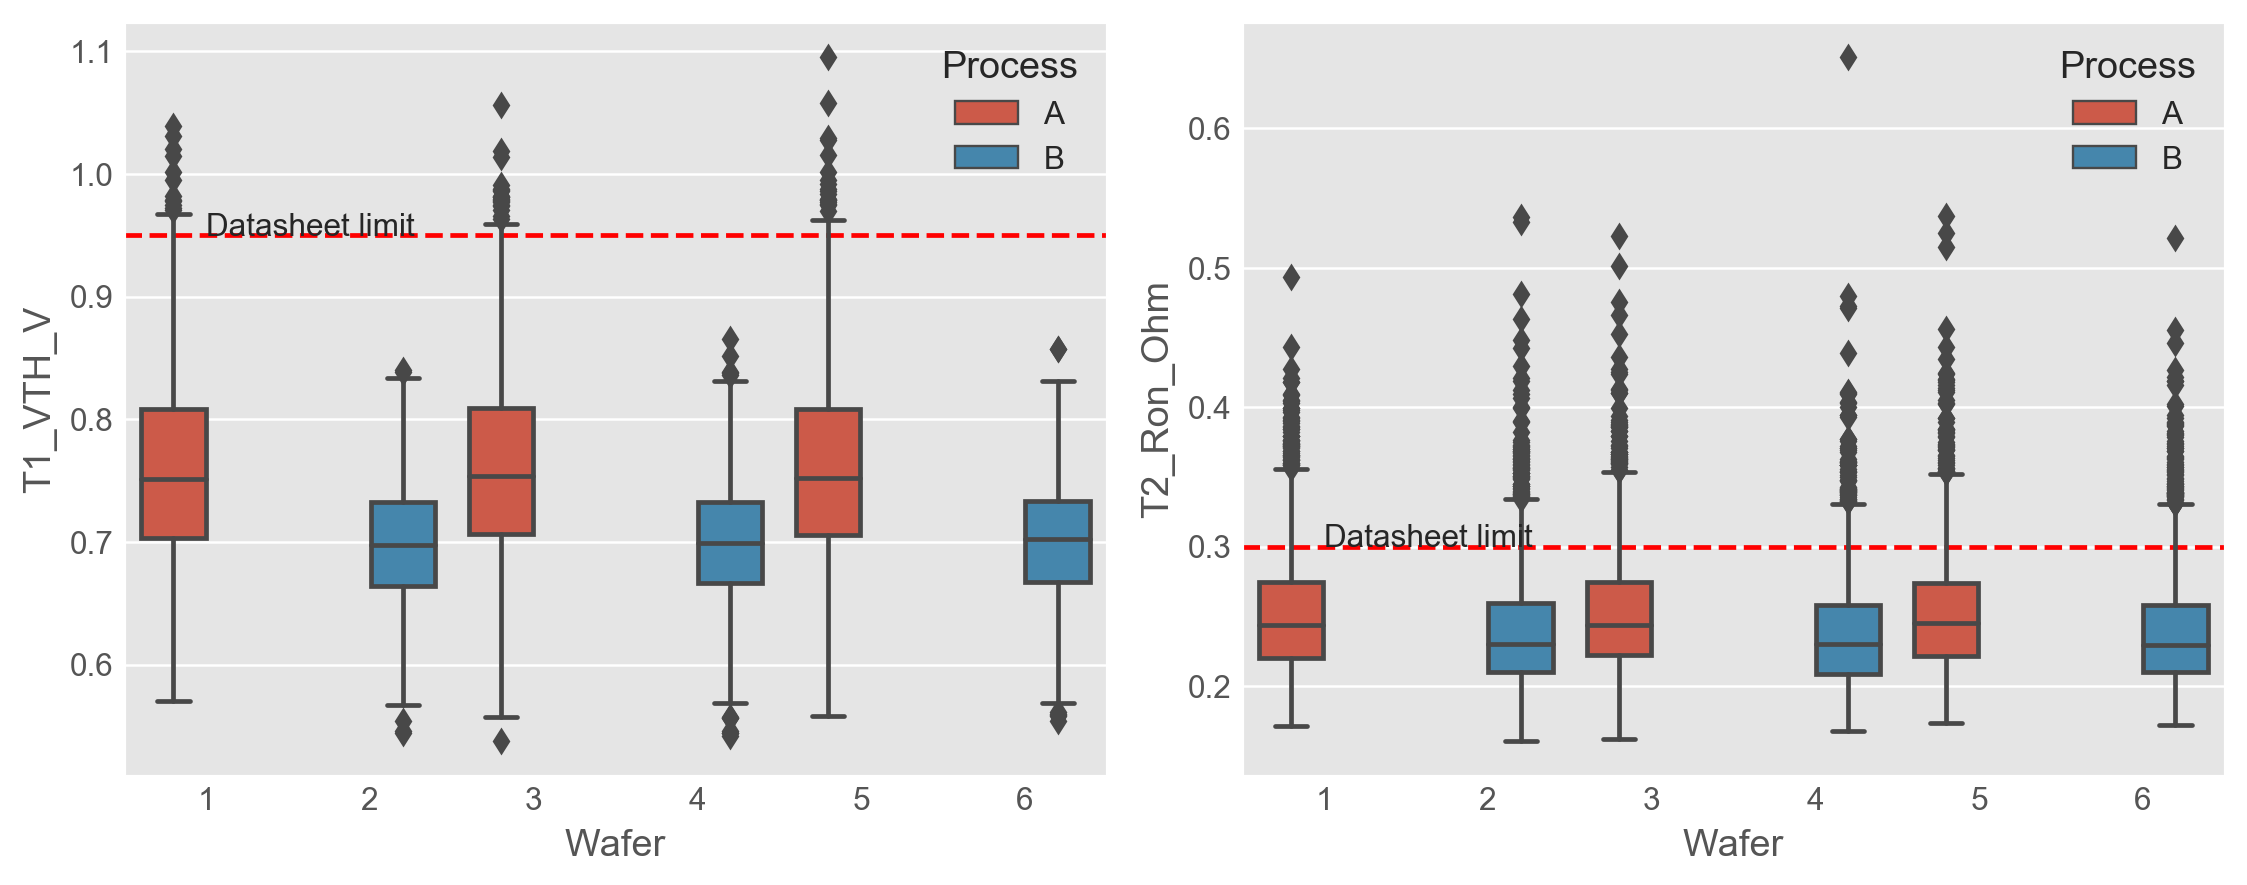

In [245]:
fig, axes = plt.subplots(1, 2, dpi=227, figsize=(10, 4))
for ax, col in zip(axes.ravel(), ['T1_VTH_V', 'T2_Ron_Ohm']):
    sns.boxplot(x='Wafer', y=col, hue='Process', data=df, ax=ax)
    if col == 'T1_VTH_V':
        spec = 0.95
    else:
        spec = 0.3
    ax.hlines(spec, xmin=-0.5, xmax=5.5, color='r', linestyle='dashed')
    ax.text(0, spec, 'Datasheet limit')

plt.tight_layout()
plt.savefig('fig.png')

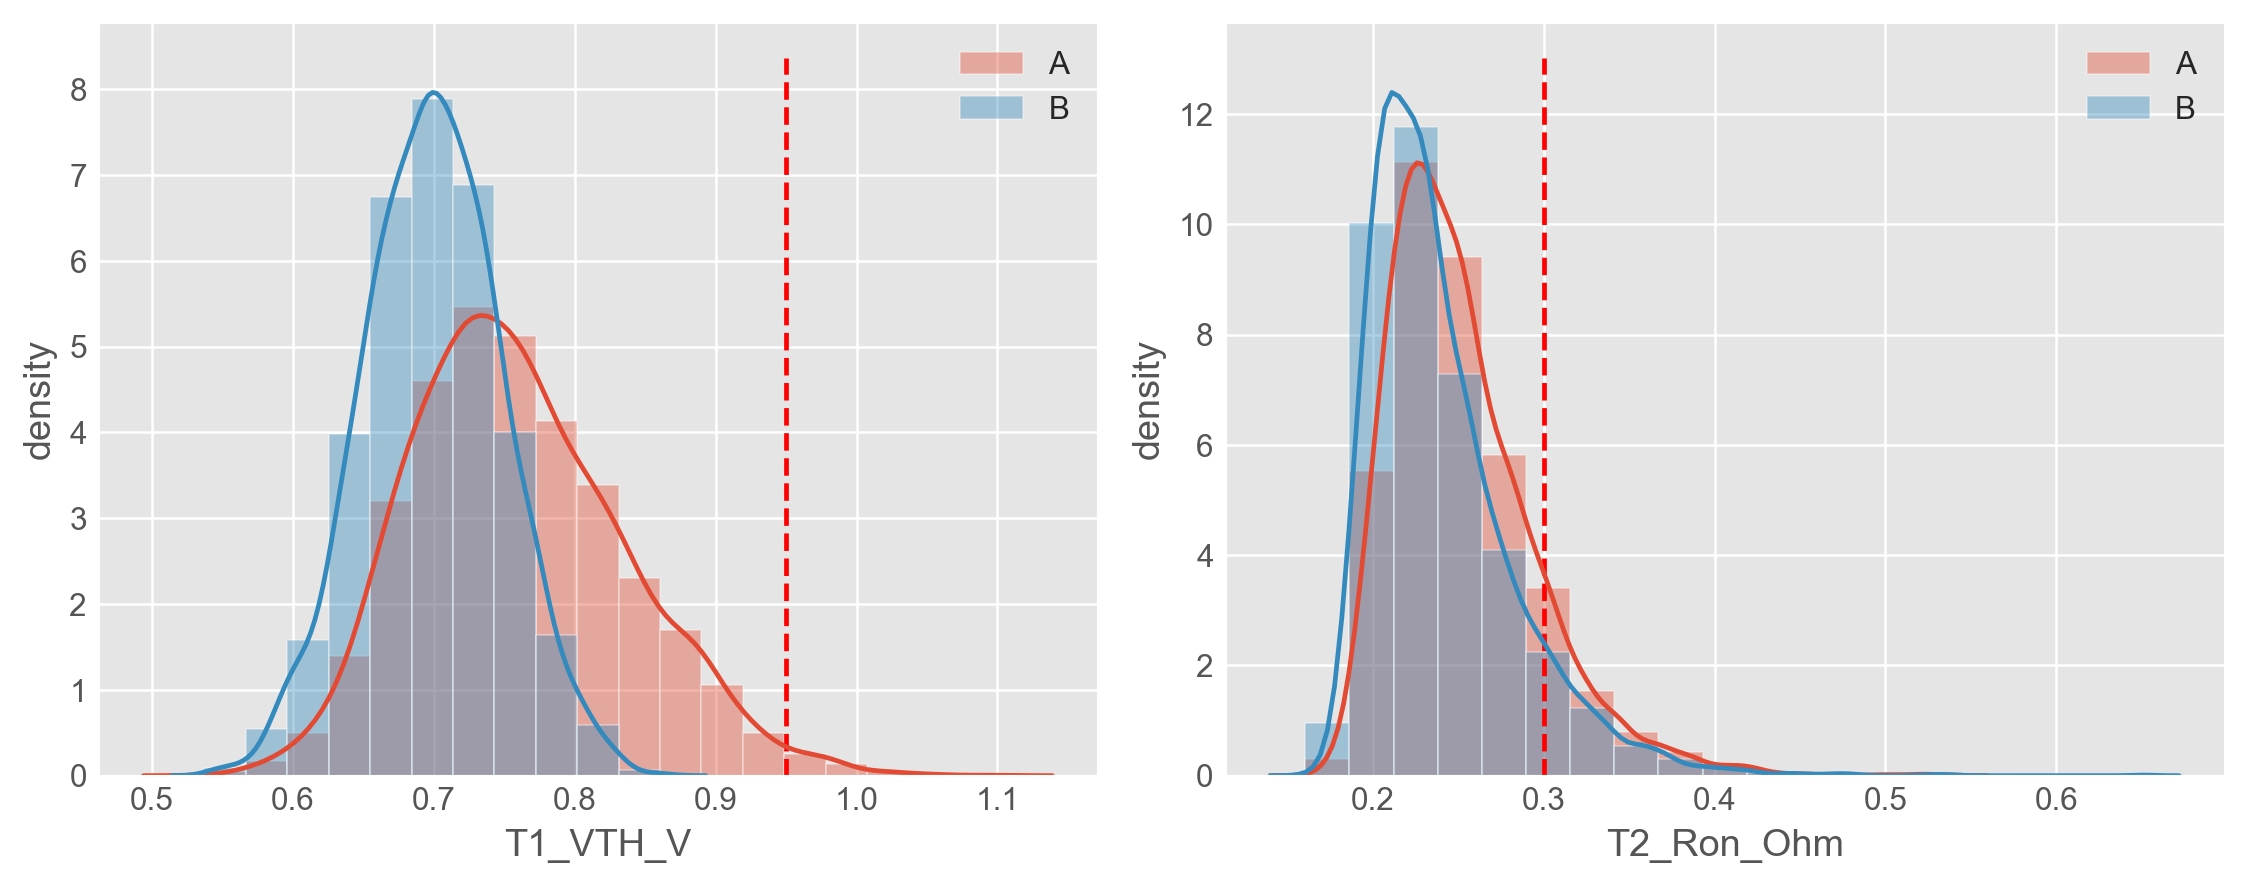

In [246]:
fig, axes = plt.subplots(1, 2, dpi=227, figsize=(10, 4))

for ax, col in zip(axes.ravel(), ['T1_VTH_V', 'T2_Ron_Ohm']):
    bins = np.linspace(df[col].min(), df[col].max(), 20)
    sns.distplot(df[df['Process'] == 'A'][col], bins=bins, ax=ax,
                 hist_kws={'edgecolor': 'w'}, label='A')
    g = sns.distplot(df[df['Process'] == 'B'][col], bins=bins, ax=ax,
                 hist_kws={'edgecolor': 'w'}, label='B')
    if col == 'T1_VTH_V':
        spec = 0.95
    else:
        spec = 0.3
    ax.vlines(spec, ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], color='r', linestyle='dashed')
    ax.legend()
    ax.set_ylabel('density')

plt.tight_layout()
plt.savefig('fig.png')

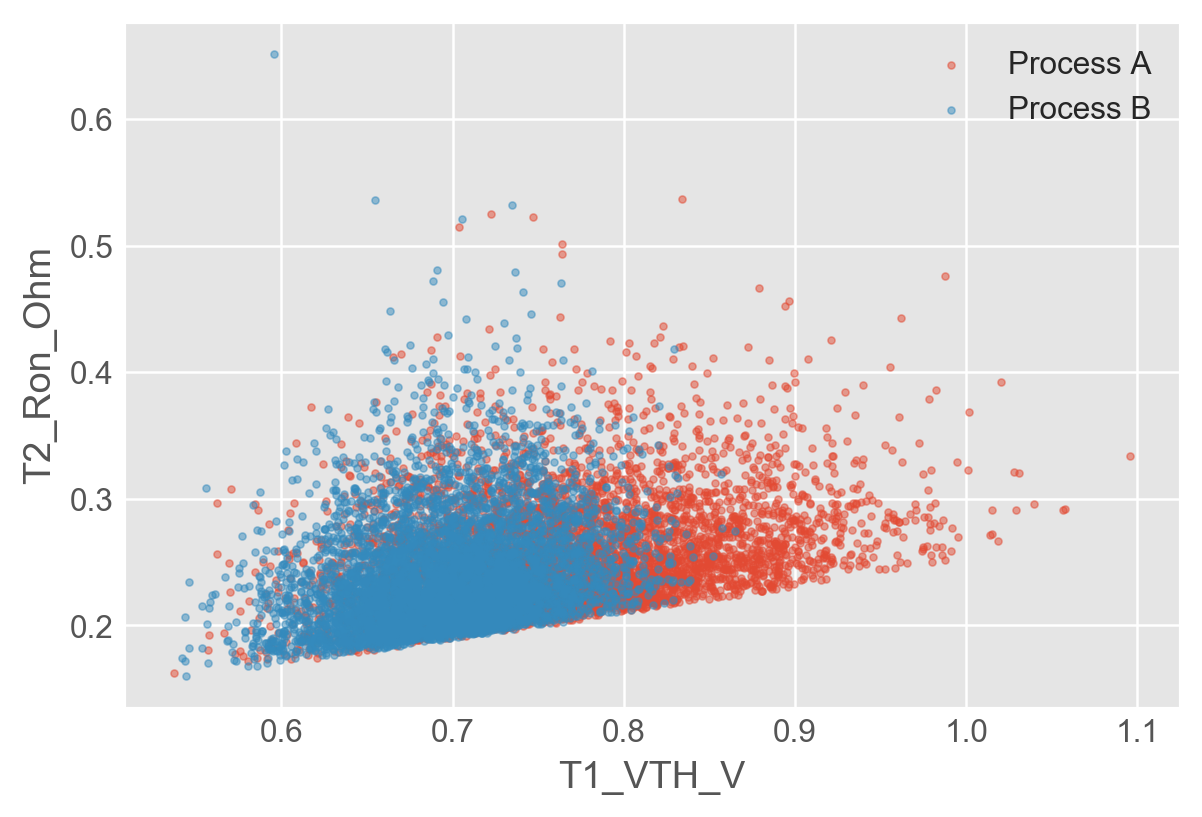

In [271]:
plt.figure(dpi=227)
plt.scatter(df[df['Process'] == 'A']['T1_VTH_V'], df[df['Process'] == 'A']['T2_Ron_Ohm'],
            s=5, alpha=0.5, label='Process A')
plt.scatter(df[df['Process'] == 'B']['T1_VTH_V'], df[df['Process'] == 'B']['T2_Ron_Ohm'],
            s=5, alpha=0.5, label='Process B')
plt.legend()
plt.xlabel('T1_VTH_V')
plt.ylabel('T2_Ron_Ohm')
plt.savefig('fig.png')

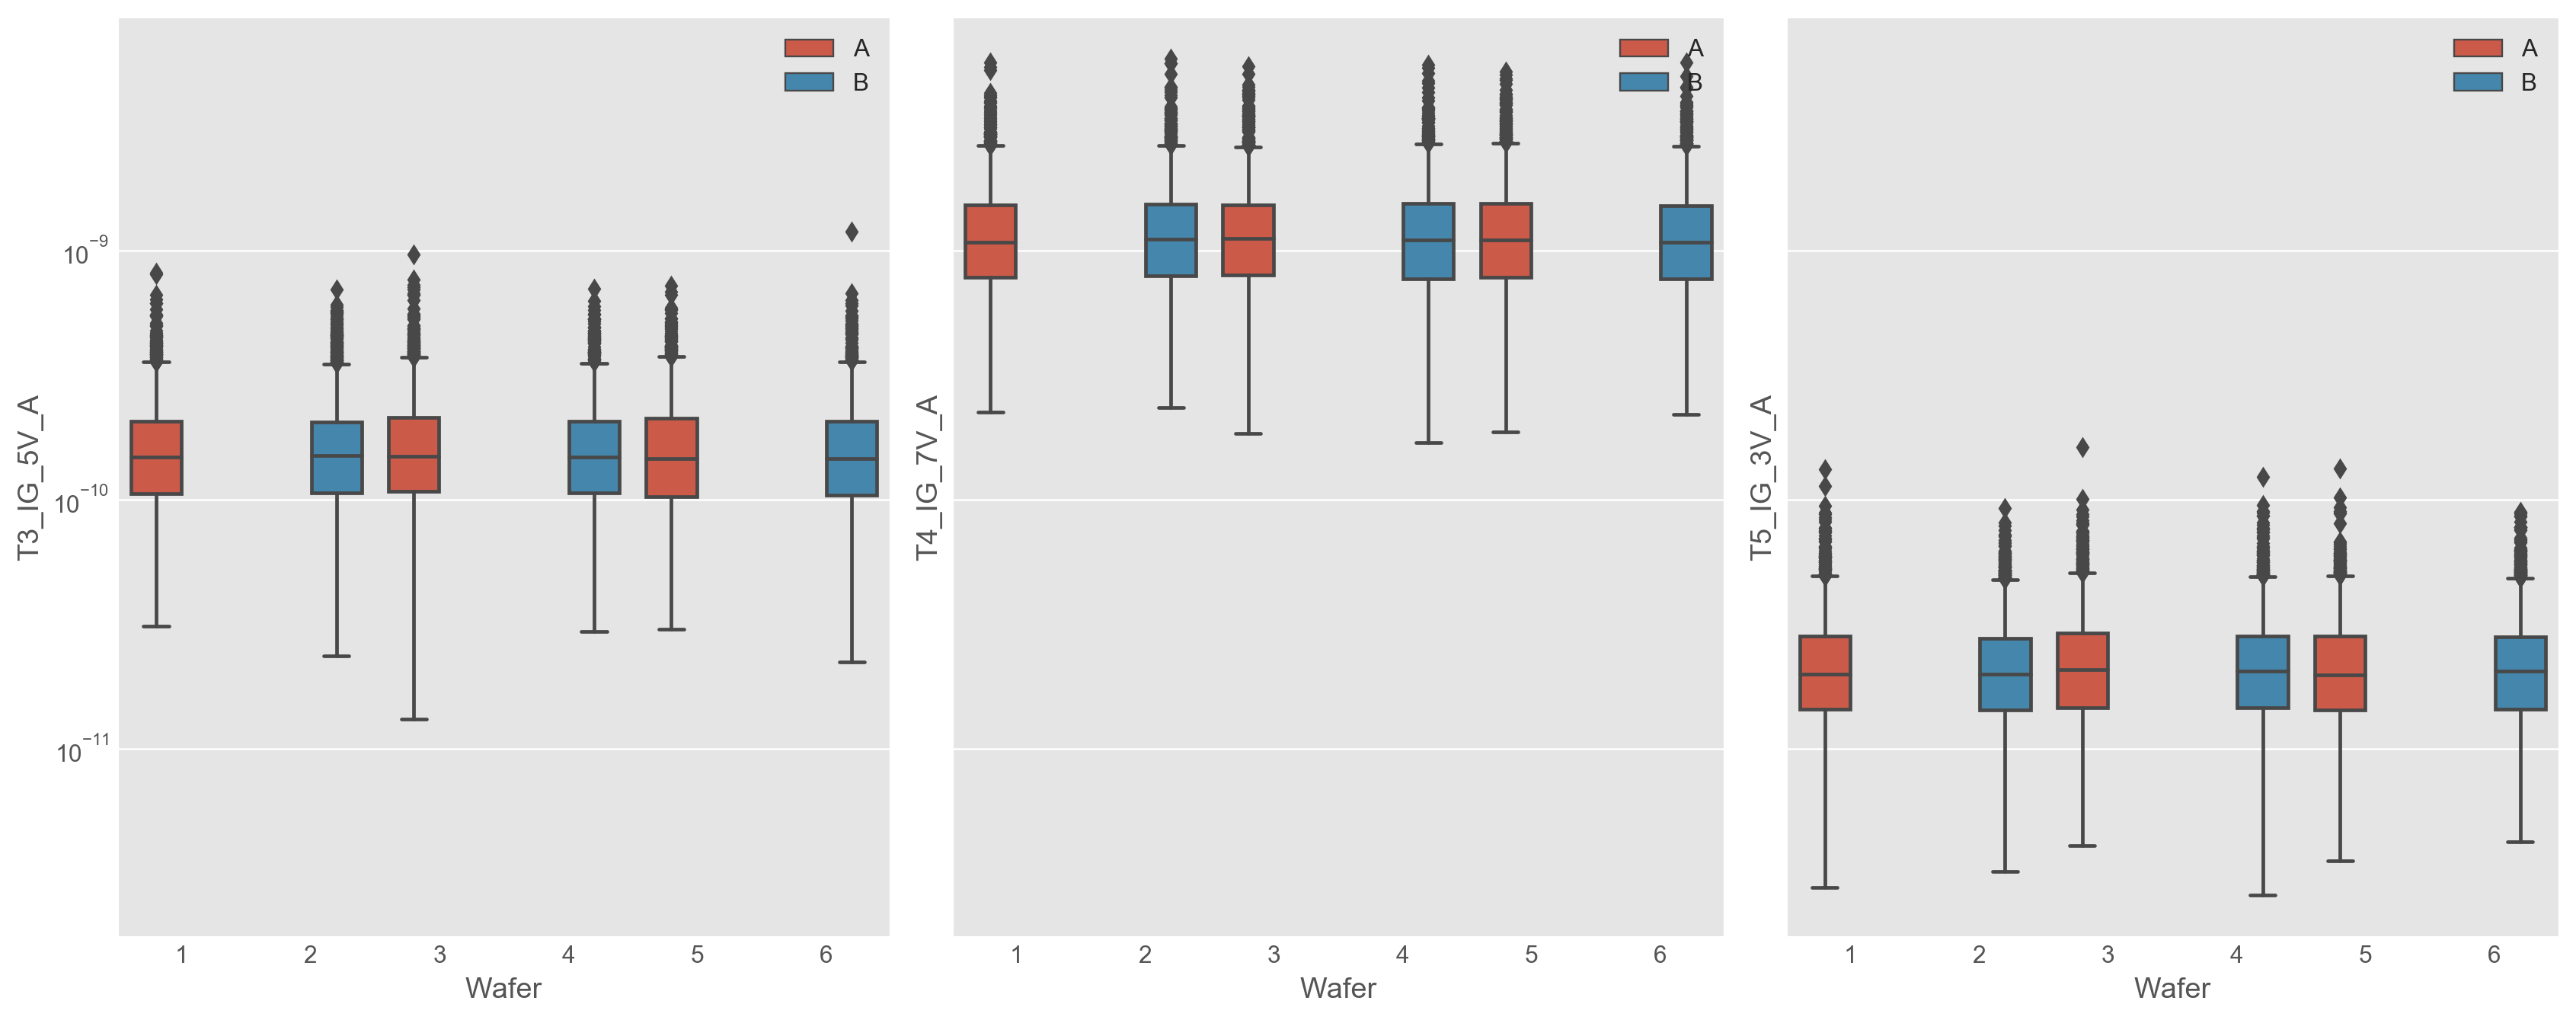

In [247]:
fig, axes = plt.subplots(1, 3, sharey=True, dpi=227, figsize=(15, 6))
for ax, col in zip(axes.ravel(), ['T3_IG_5V_A', 'T4_IG_7V_A', 'T5_IG_3V_A']):
    sns.boxplot(x='Wafer', y=col, hue='Process', data=df, ax=ax)
    ax.legend(loc='upper right')
plt.yscale('log')
plt.tight_layout()
plt.savefig('fig.png')